# Summary statistics and exploratory plots for weather data pulled using the Dark Sky API

This notebook contains some light cleaning, summary statistics, and plots using DC weather data from 2010 - 2017.

Old version - need to update with most recent data


* Variable definitions - https://darksky.net/dev/docs#response-format



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('darkgrid')
from sklearn.neighbors import KernelDensity

df = pd.read_csv(r'~\git\Bikeshare-DC\data\Dark_Sky_2010_2017.csv', parse_dates=[0], infer_datetime_format=True)
#df = pd.read_csv('~/CaBi/Output/DarkSky_Clean_20180324_135154.csv', parse_dates=[0], infer_datetime_format=True)

df.shape

(2922, 27)

In [2]:
# creating weather dummies
df = pd.concat([df, pd.get_dummies(df['precipType'])], axis=1)
df.rename(columns = {'rain':'rain_dummy','snow':'snow_dummy'}, inplace = True)

# converting Unix time to human-readable time
timevars = ['apparentTemperatureHighTime','apparentTemperatureLowTime','precipIntensityMaxTime',
           'sunriseTime','sunsetTime','temperatureHighTime','temperatureLowTime','time']
for var in timevars:
    df[var] = pd.to_datetime(df[var],unit='s')

# creating time variables for slicing
df['year'] = df['date'].dt.year 
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday
df['weekday_name'] = df['date'].dt.weekday_name
df['quarter'] = df['date'].dt.quarter

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 34 columns):
date                           2922 non-null datetime64[ns]
apparentTemperatureHigh        2922 non-null float64
apparentTemperatureHighTime    2922 non-null datetime64[ns]
apparentTemperatureLow         2922 non-null float64
apparentTemperatureLowTime     2922 non-null datetime64[ns]
cloudCover                     2916 non-null float64
dewPoint                       2922 non-null float64
humidity                       2922 non-null float64
moonPhase                      2922 non-null float64
precipAccumulation             124 non-null float64
precipIntensity                2922 non-null float64
precipIntensityMax             2922 non-null float64
precipIntensityMaxTime         1590 non-null datetime64[ns]
precipProbability              2922 non-null float64
precipType                     1453 non-null object
pressure                       2922 non-null float64
sunriseTime        

In [3]:
# summary statistics
print(df.describe())
df.describe()

       apparentTemperatureHigh  apparentTemperatureLow   cloudCover  \
count              2922.000000             2922.000000  2916.000000   
mean                 65.450681               49.659582     0.353282   
std                  20.745388               19.736641     0.249634   
min                   2.240000              -10.840000     0.000000   
25%                  51.045000               33.285000     0.160000   
50%                  67.595000               52.240000     0.280000   
75%                  82.245000               67.270000     0.480000   
max                 113.670000               90.060000     1.000000   

          dewPoint     humidity    moonPhase  precipAccumulation  \
count  2922.000000  2922.000000  2922.000000          124.000000   
mean     46.026218     0.667645     0.500065            1.182863   
std      18.536844     0.135031     0.288220            2.406253   
min      -9.730000     0.210000     0.000000            0.000000   
25%      31.220000  

,apparentTemperatureHigh,apparentTemperatureLow,cloudCover,dewPoint,humidity,moonPhase,precipAccumulation,precipIntensity,precipIntensityMax,precipProbability,...,visibility,windBearing,windSpeed,daylightHours,rain_dummy,snow_dummy,year,month,weekday,quarter
count,2922.000000,2922.000000,2916.000000,2922.000000,2922.000000,2922.000000,124.000000,2922.000000,2922.000000,2922.000000,...,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,65.450681,49.659582,0.353282,46.026218,0.667645,0.500065,1.182863,0.003873,0.029613,0.286116,...,9.307149,209.615332,5.352420,12.197063,0.454825,0.042437,2013.500342,6.522930,3.002053,2.508556
std,20.745388,19.736641,0.249634,18.536844,0.135031,0.288220,2.406253,0.012069,0.073046,0.375338,...,1.119278,99.007546,3.143633,1.878743,0.498040,0.201618,2.291531,3.449293,2.000512,1.117274
min,2.240000,-10.840000,0.000000,-9.730000,0.210000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.130000,0.000000,0.030000,9.434722,0.000000,0.000000,2010.000000,1.000000,0.000000,1.000000
25%,51.045000,33.285000,0.160000,31.220000,0.570000,0.250000,0.116000,0.000000,0.000000,0.000000,...,9.142500,153.000000,3.070000,10.374792,0.000000,0.000000,2012.000000,4.000000,1.000000,2.000000
50%,67.595000,52.240000,0.280000,48.070000,0.670000,0.490000,0.316500,0.000000,0.000900,0.000000,...,9.780000,205.000000,4.810000,12.224167,0.000000,0.000000,2013.500000,7.000000,3.000000,3.000000
75%,82.245000,67.270000,0.480000,62.650000,0.760000,0.750000,1.411750,0.002600,0.025600,0.660000,...,9.980000,302.000000,6.957500,14.024167,1.000000,0.000000,2015.750000,10.000000,5.000000,4.000000
max,113.670000,90.060000,1.000000,75.840000,0.970000,0.990000,21.427000,0.422000,1.184700,1.000000,...,10.000000,359.000000,20.660000,14.897500,1.000000,1.000000,2017.000000,12.000000,6.000000,4.000000


In [4]:
# KDE with Scikit-Learn
def kde_sklearn(x, x_grid, bandwidth=0.2):
    kde_skl = KernelDensity(bandwidth=bandwidth)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples returns log-likelihood of samples
    pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(pdf)

def density(column, bandwidth=0.2):   
    x_grid = np.linspace(df.loc[:, column].min(), df.loc[:, column].max())
    x = df.loc[:, column]
    pdf = kde_sklearn(x, x_grid, bandwidth=bandwidth)
    ax.plot(x_grid, pdf, color='blue', alpha=0.5, lw=1)
    ax.set_title('KDE for {}'.format(column))
    plt.show()

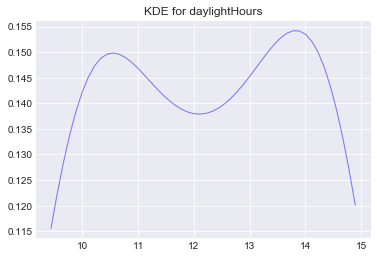

In [5]:
%matplotlib inline
# can use the density function to produce KDEs for any single variable
# nonparametric estimation of the pdf

fig, ax = plt.subplots()
density('daylightHours', bandwidth=1)

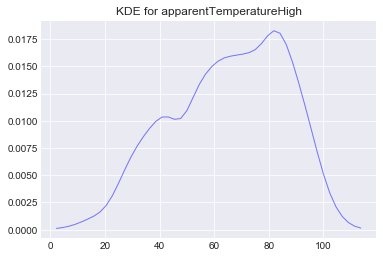

In [6]:
%matplotlib inline
fig, ax = plt.subplots()
density('apparentTemperatureHigh', bandwidth=4)

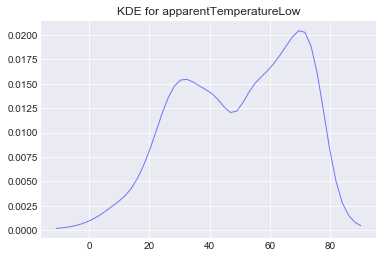

In [7]:
%matplotlib inline
fig, ax = plt.subplots()
density('apparentTemperatureLow', bandwidth=4)

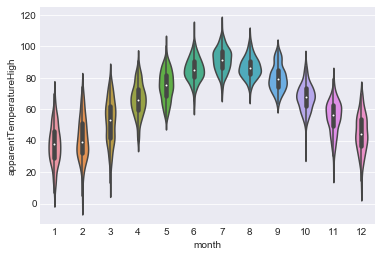

In [8]:
sns.violinplot(x=df['month'], y=df['apparentTemperatureHigh'])

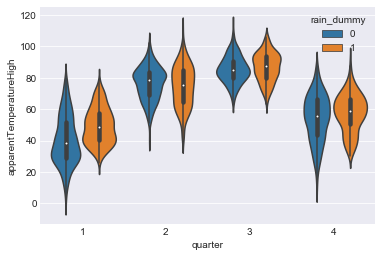

In [9]:
sns.violinplot(x=df['quarter'], y=df['apparentTemperatureHigh'], hue=df['rain_dummy'])

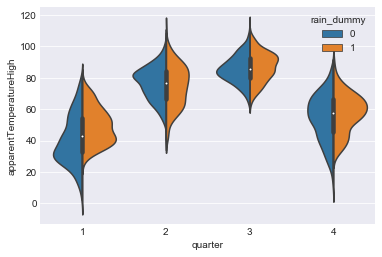

In [10]:
sns.violinplot(x=df['quarter'], y=df['apparentTemperatureHigh'], hue=df['rain_dummy'], split=True)

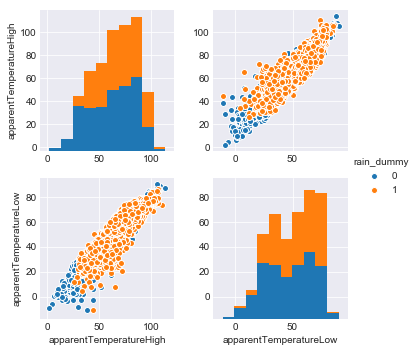

In [19]:
sns.pairplot(df, vars=['apparentTemperatureHigh','apparentTemperatureLow'], hue='rain_dummy')

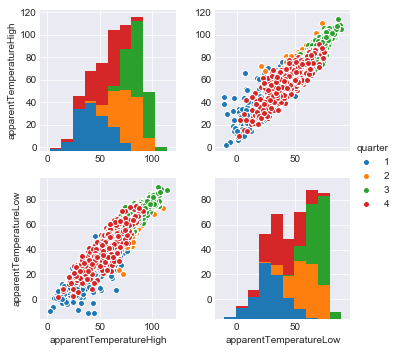

In [20]:
sns.pairplot(df, vars=['apparentTemperatureHigh','apparentTemperatureLow'], hue='quarter')